In [1]:
# 导入数据结构
import pandas as pd
cloudservers = pd.read_csv('data/category.csv',header=None
                           ,prefix=None
                           ,names=[u'类型',u'cpu数目',u'内存大小(MB)'])
cloudservers

,类型,cpu数目,内存大小(MB)
0,flavor1,1,1024
1,flavor2,1,2048
2,flavor3,1,4096
3,flavor4,2,2048
4,flavor5,2,4096
5,flavor6,2,8192
6,flavor7,4,4096
7,flavor8,4,8192
8,flavor9,4,16384
9,flavor10,8,8192


In [2]:
import os
import glob
from collections import defaultdict
def loaddata(traindata):
    data_label = defaultdict(list)
    #traindata = glob.glob(r'{}/*.txt'.format(dir))
    #for i in traindata:
    with open(traindata) as f:
        f_lines = f.readlines()
        for x in f_lines:
            x = x.split('\t')
            daytime = str(x[-1].split(' ')[0])
            cloudserve =  x[1]
            data_label[daytime].append(cloudserve) 
    return sorted(data_label.items())
data = loaddata('data/sampledata/TrainData_2015.1.1_2015.2.19.txt')
period_lenth = [[0 for i in range(len(data))] for i in range(15)]
category = ['flavor1','flavor2','flavor3','flavor4','flavor5',
            'flavor6','flavor7','flavor8','flavor9','flavor10',
            'flavor11','flavor12','flavor13','flavor14','flavor15']
for _,i in enumerate(data):
    for x in i[1]:
        try:
            index_flavor = category.index(x)
        except:
            index_flavor = -1
        if index_flavor != -1:
            period_lenth[index_flavor][_] += 1


In [3]:
import os
import glob
from collections import defaultdict
def loaddata(dir):
    data_label = defaultdict(list)
    traindata = glob.glob(r'{}/*.txt'.format(dir))
    for i in traindata:
        with open(i) as f:
            f_lines = f.readlines()
            for x in f_lines:
                x = x.split('\t')
                daytime = str(x[-1].split(' ')[0])
                cloudserve =  x[1]
                data_label[daytime].append(cloudserve) 
    return sorted(data_label.items())
data = loaddata('data/test')
period_lenth = [[0 for i in range(len(data))] for i in range(15)]
category = ['flavor1','flavor2','flavor3','flavor4','flavor5',
            'flavor6','flavor7','flavor8','flavor9','flavor10',
            'flavor11','flavor12','flavor13','flavor14','flavor15']
for _,i in enumerate(data):
    for x in i[1]:
        try:
            index_flavor = category.index(x)
        except:
            index_flavor = -1
        if index_flavor != -1:
            period_lenth[index_flavor][_] += 1
#print(period_lenth)

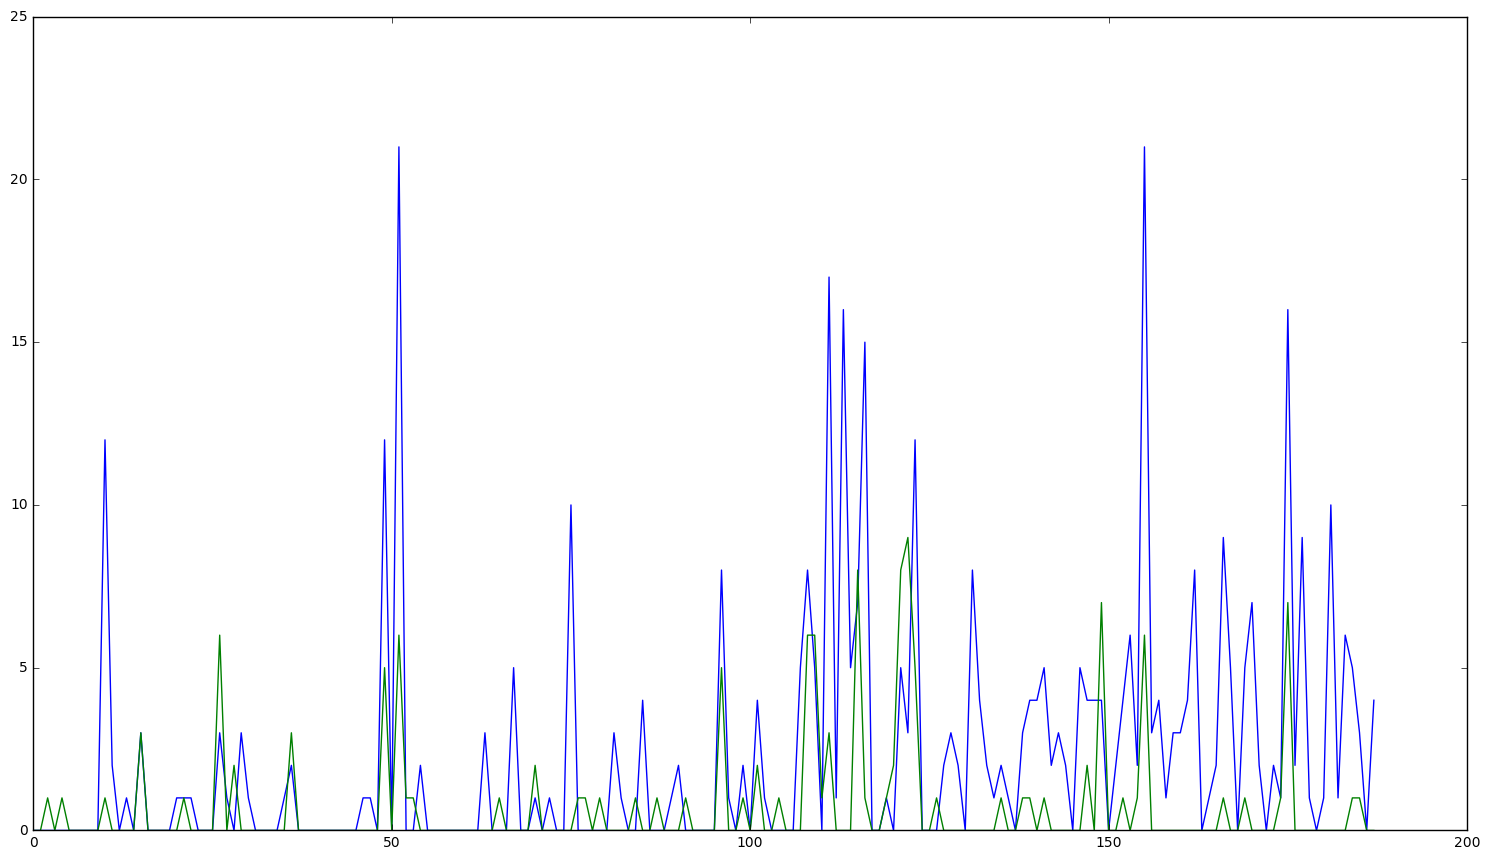

In [10]:
%matplotlib inline
import matplotlib
matplotlib.pyplot.minorticks_on
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
import matplotlib.pyplot as plt
for _ in period_lenth[4:6]:
    plt.plot(range(len(data)),_)
plt.show()

# 对数据进行周期性展示